<a href="https://colab.research.google.com/github/Dicky15257/Water-Potability-Project/blob/main/Water_Potability_Predictive_Model%7C%7C_Dicky_Budiyanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install sweetviz
import sweetviz as SV
import matplotlib.pyplot as plt

     |████████████████████████████████| 15.1 MB 184 kB/s 


In [ ]:
df = pd.read_csv('/content/sample_data/water_potability.csv')
df

FileNotFoundError: ignored

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##Handling Missing Value

In [ ]:
#Return Missing Value
Miss_val = df.isna().sum()
Miss_val

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Handling missing values
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('median'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('median'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('median'))

In [ ]:
Miss_val

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Return Data Duplicated
df.duplicated().sum()

0

##Data Visualization


                                             |          | [  0%]   00:00 -> (? left)


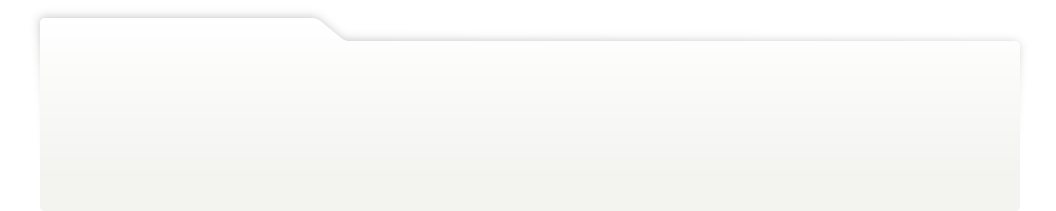
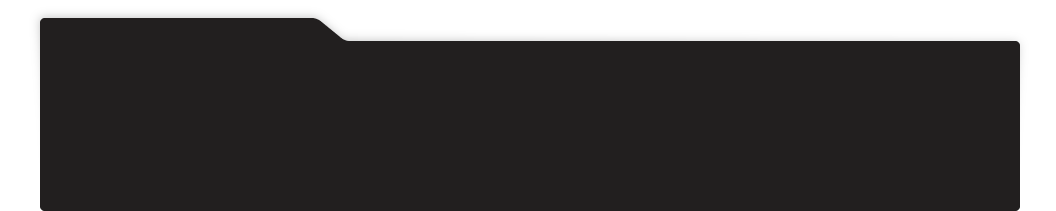
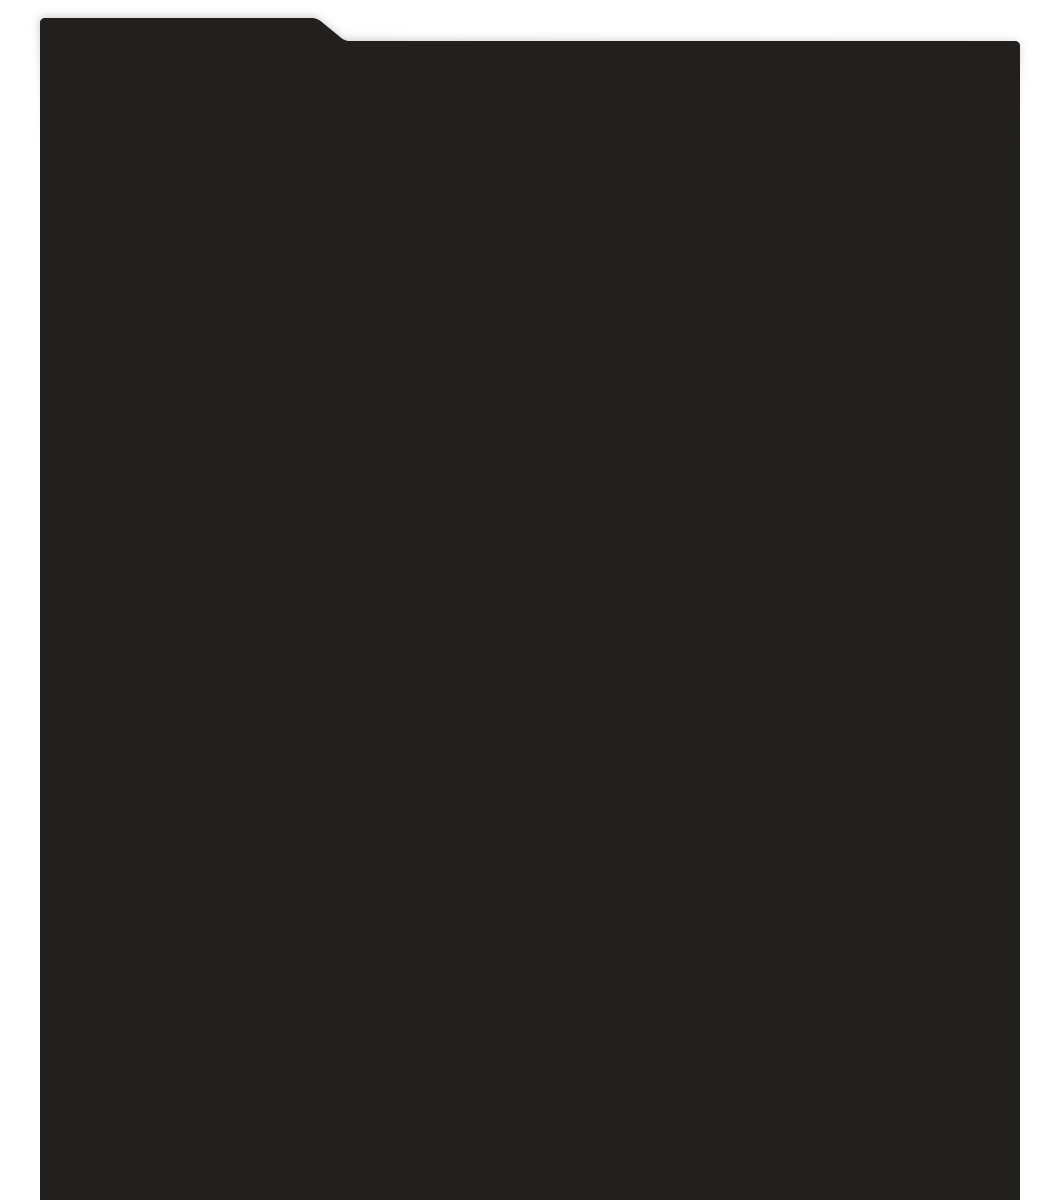
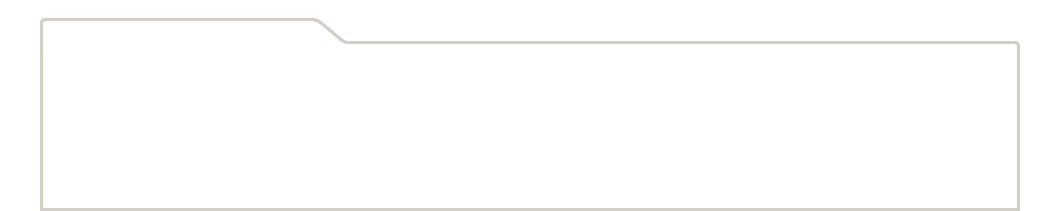
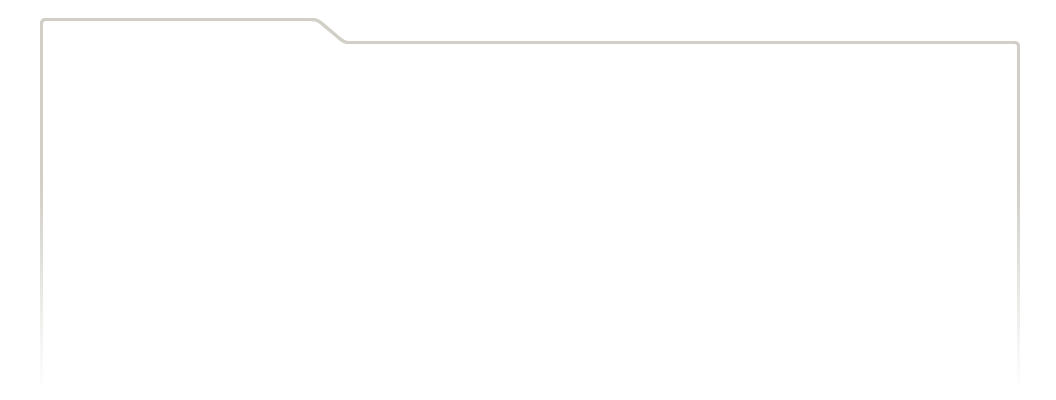
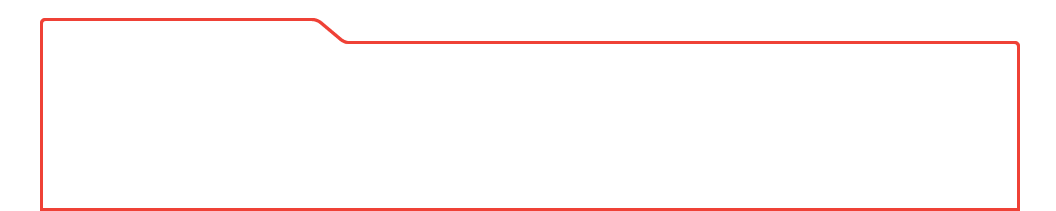
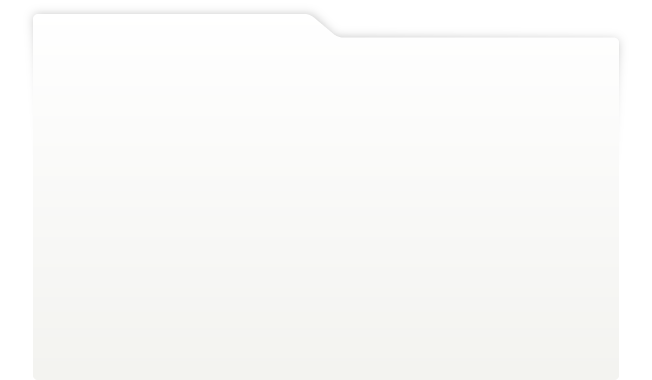
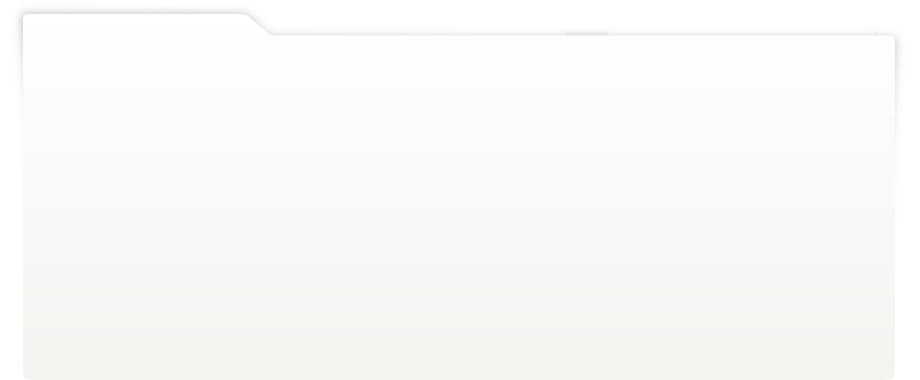
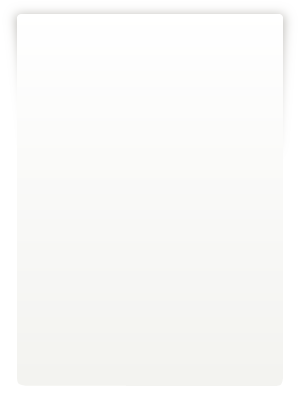
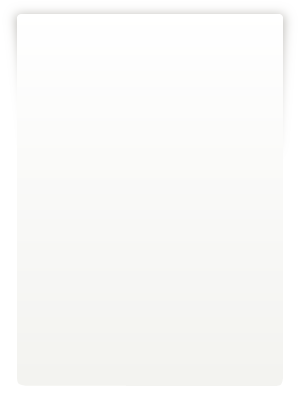
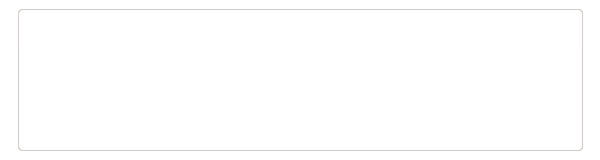
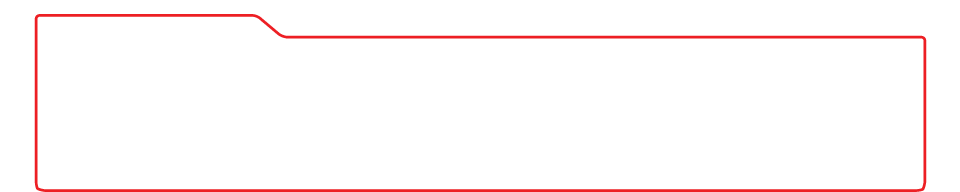
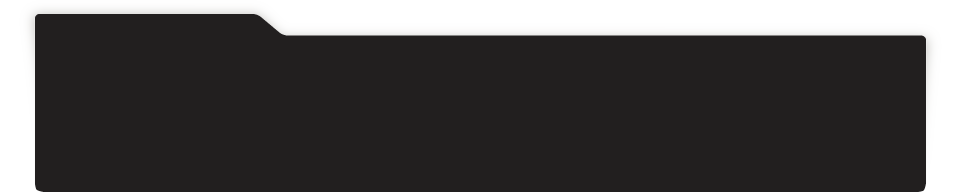
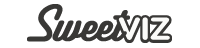
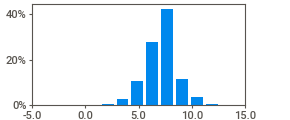
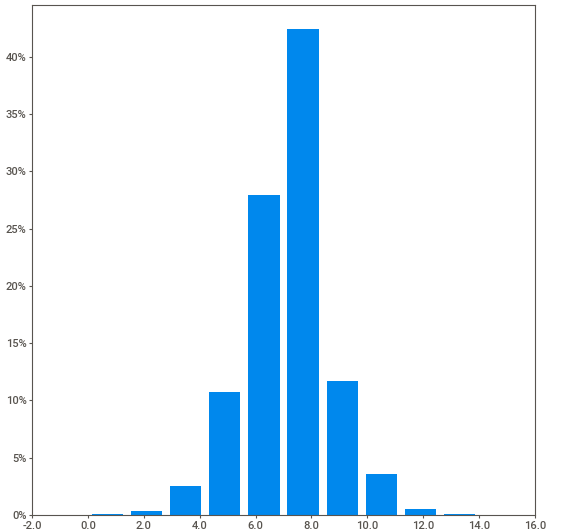
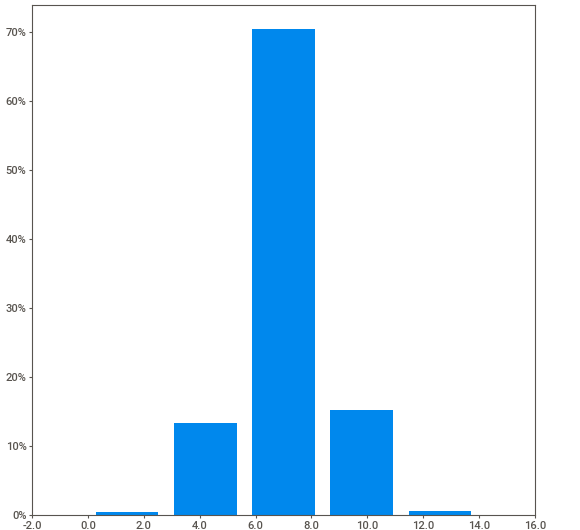
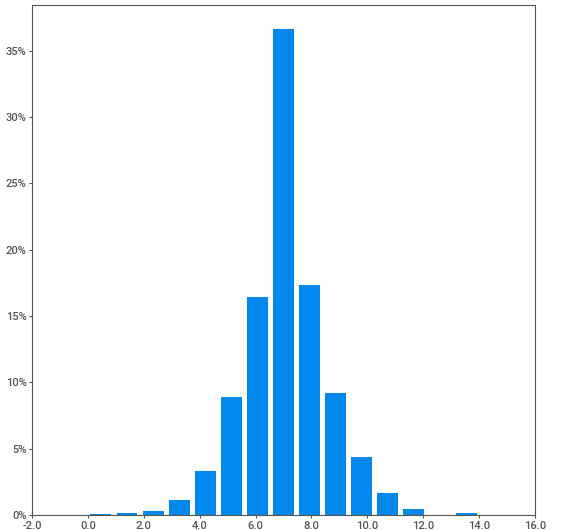
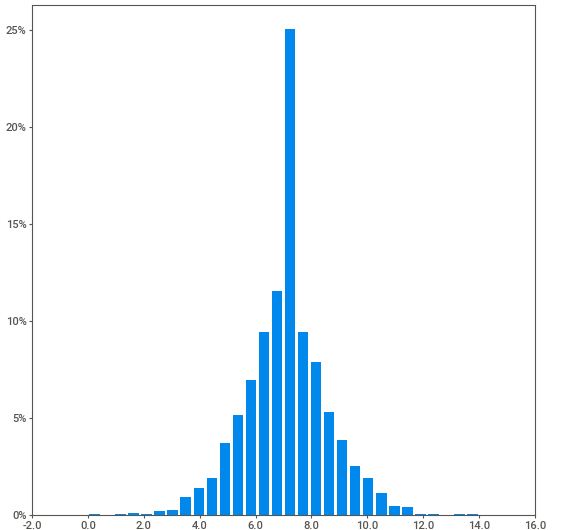
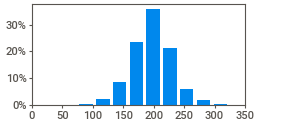
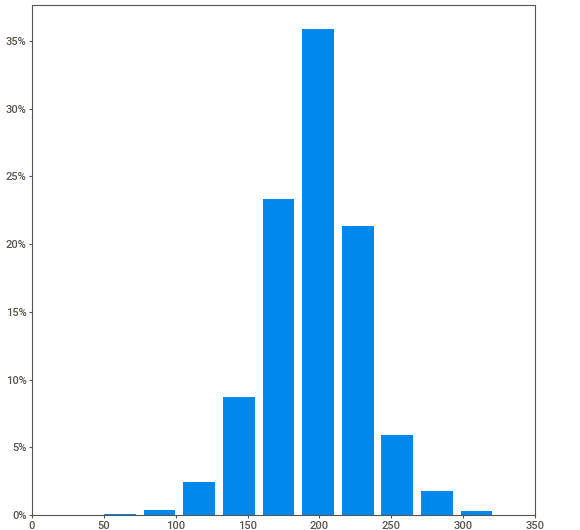
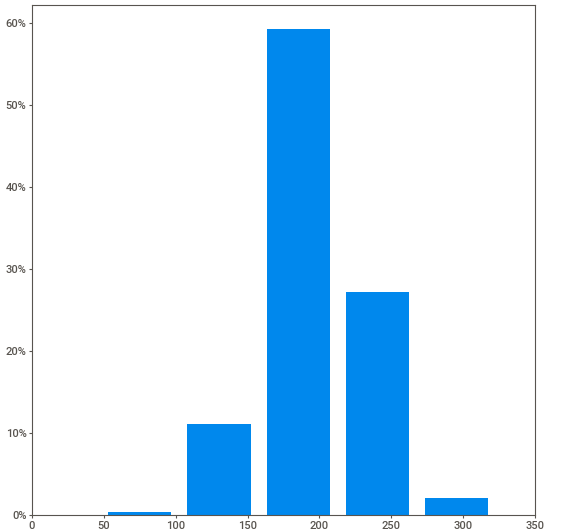
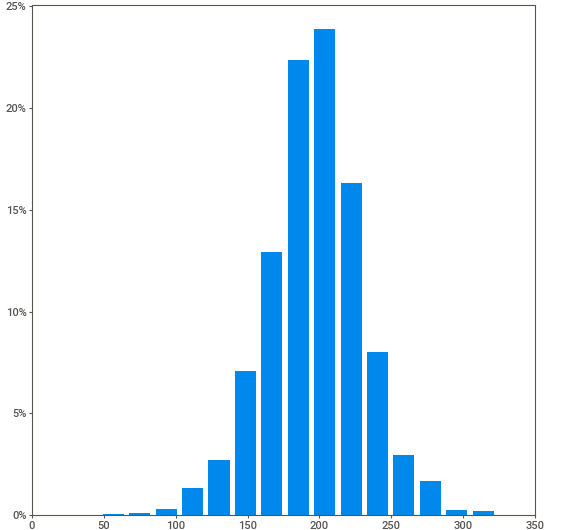
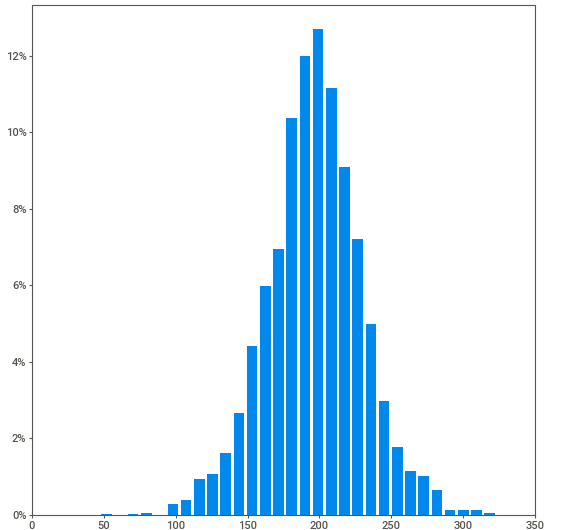
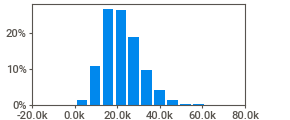
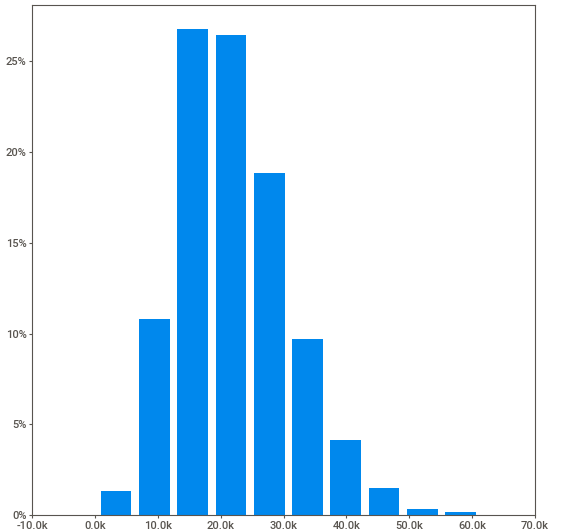
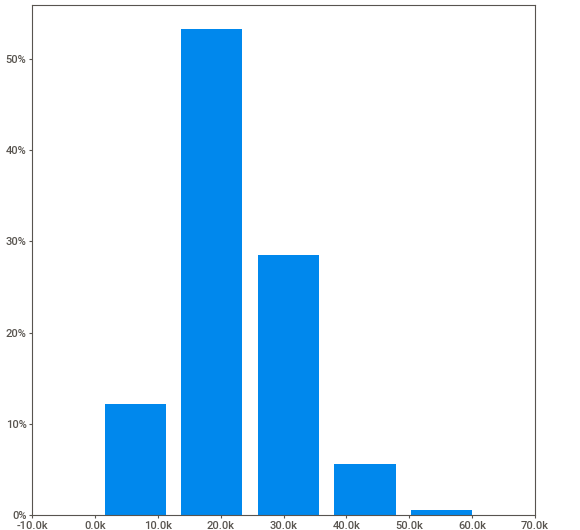
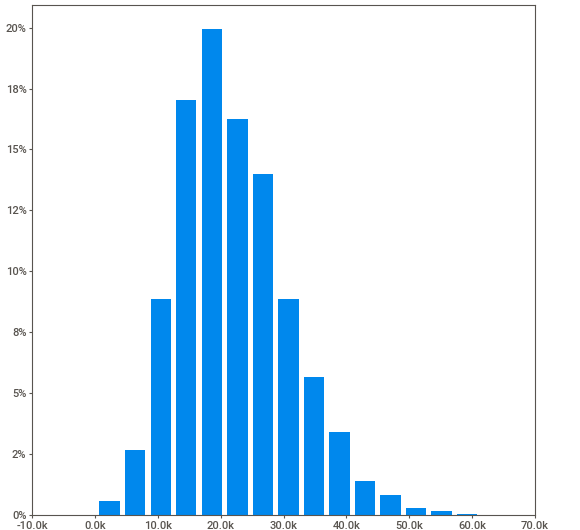
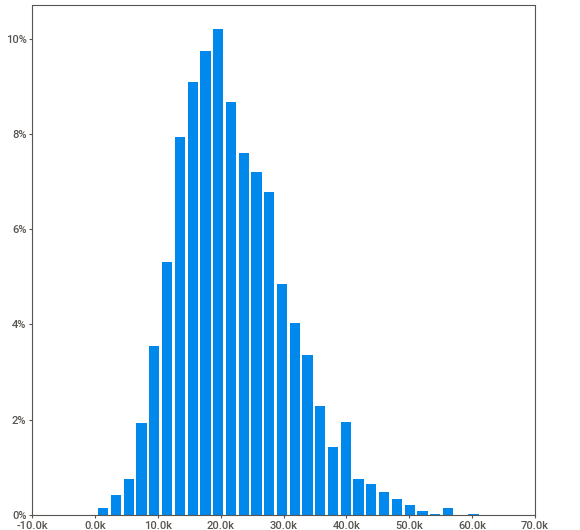
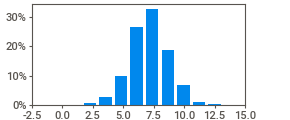
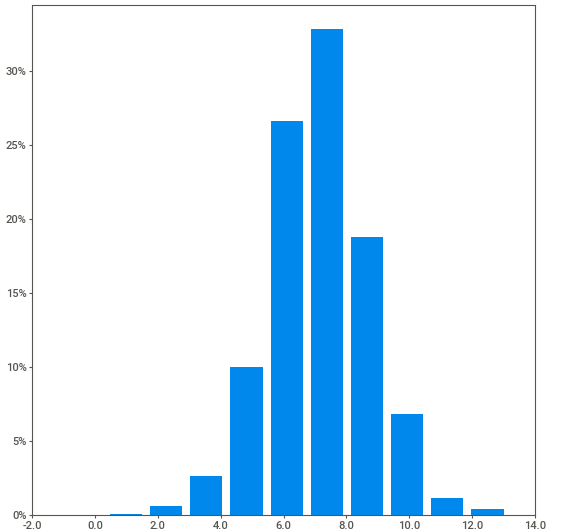
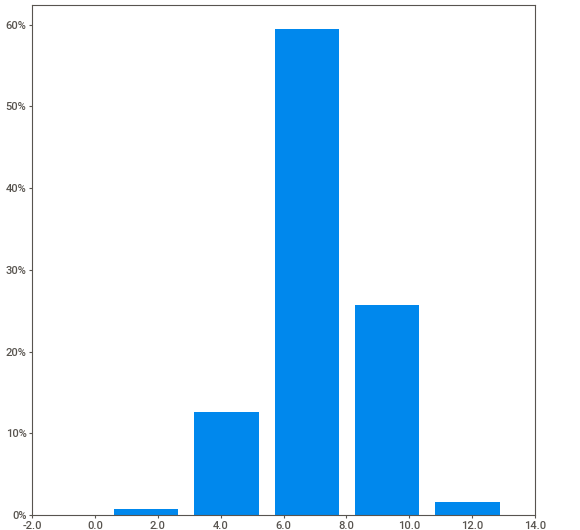
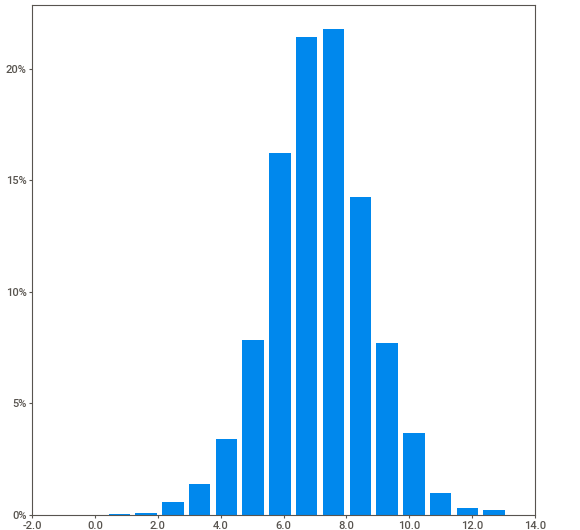
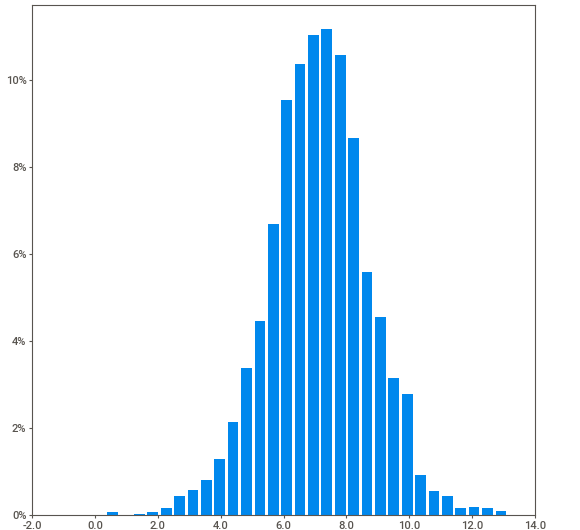
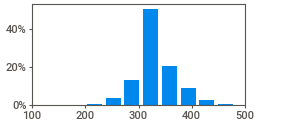
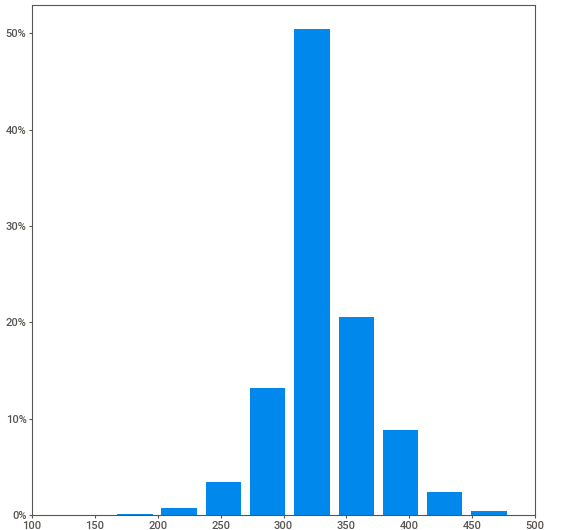
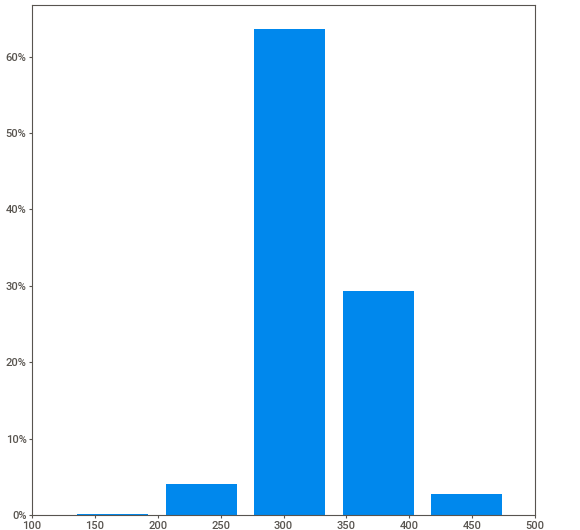
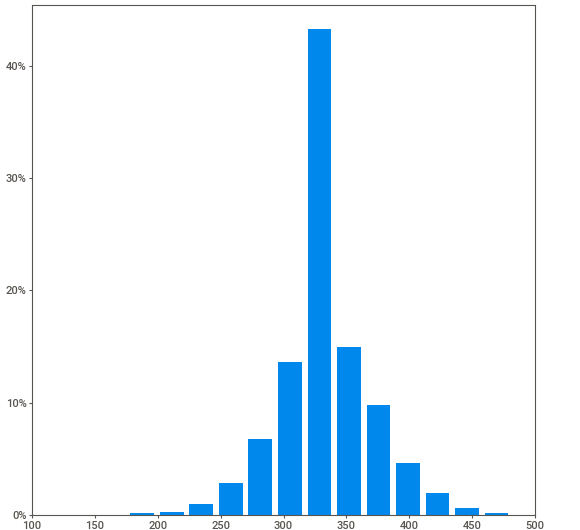
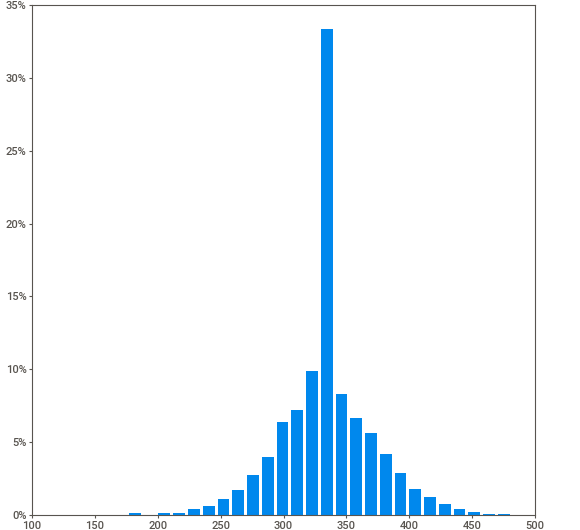
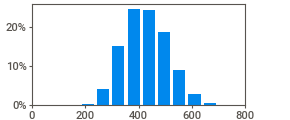
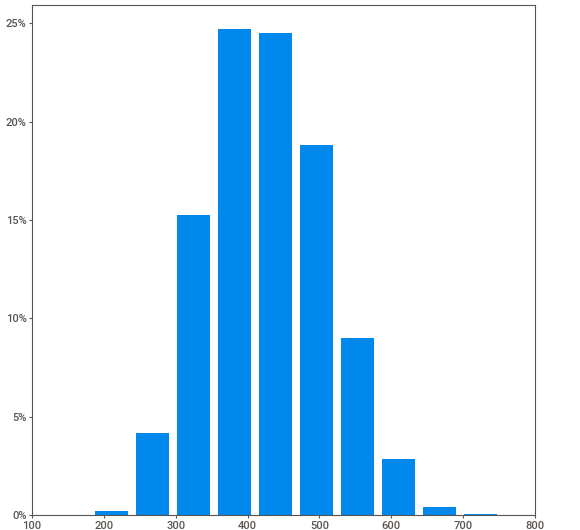
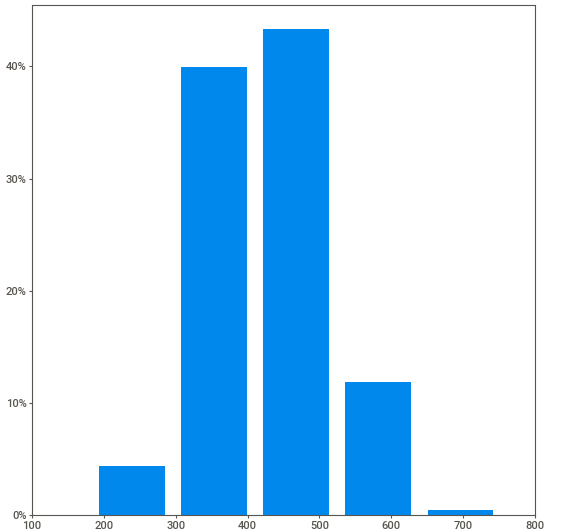
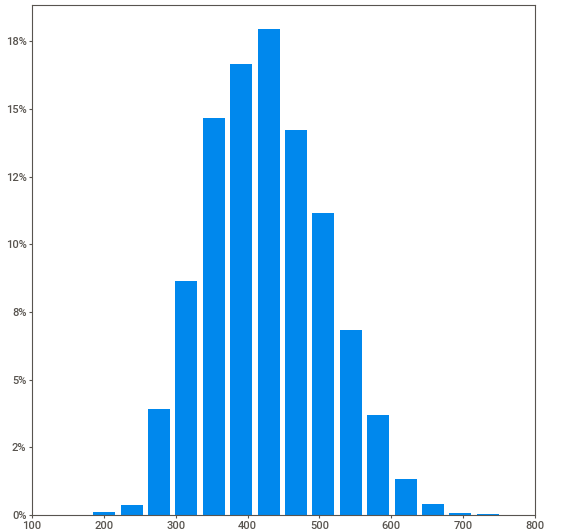
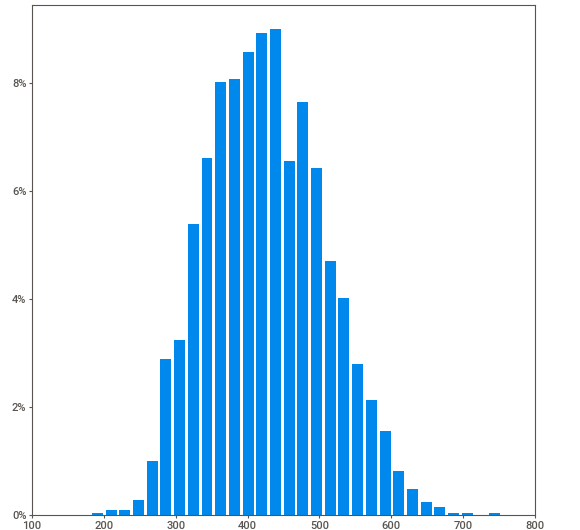
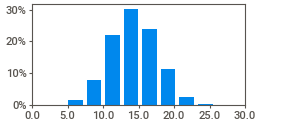
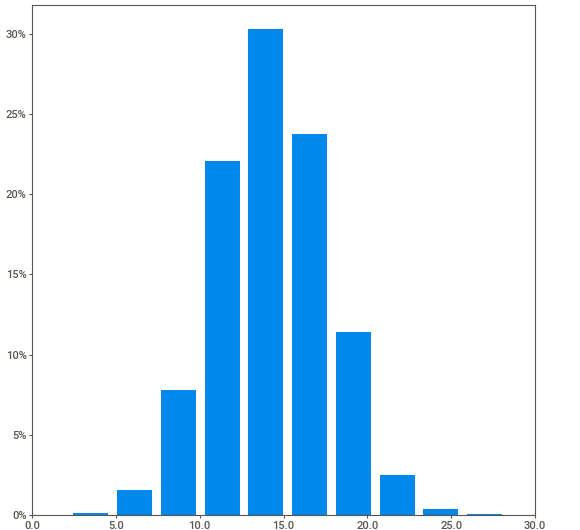
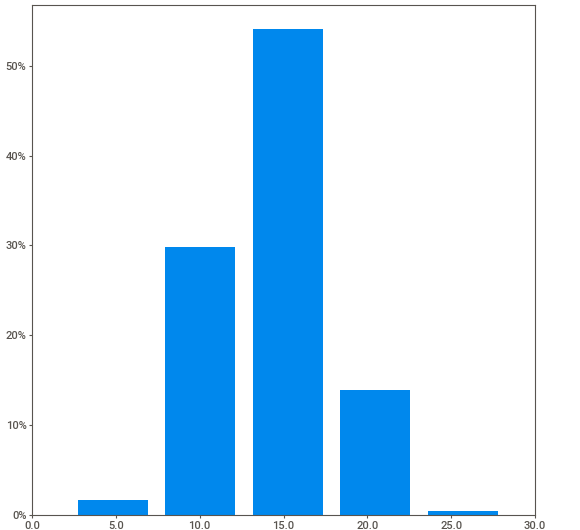
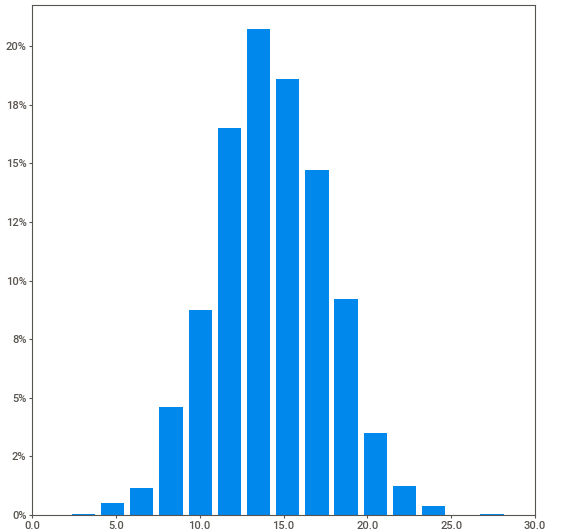
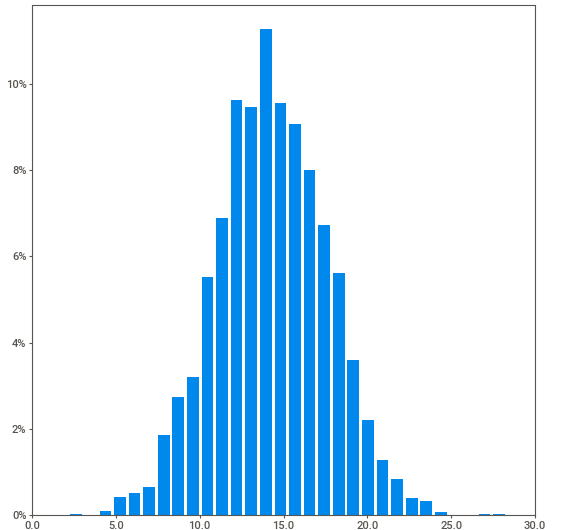
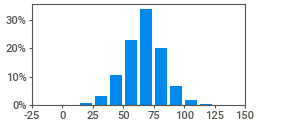
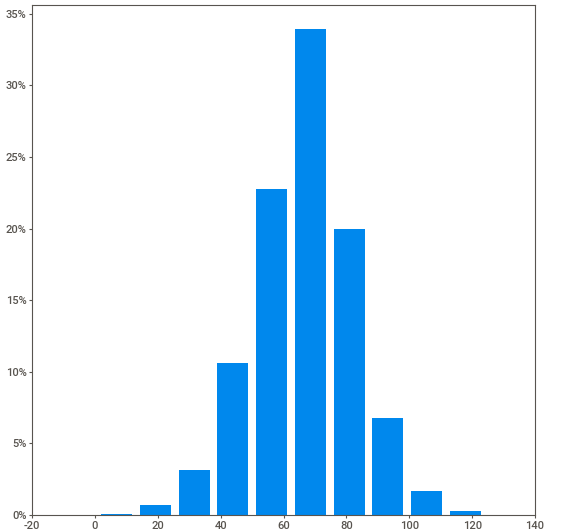
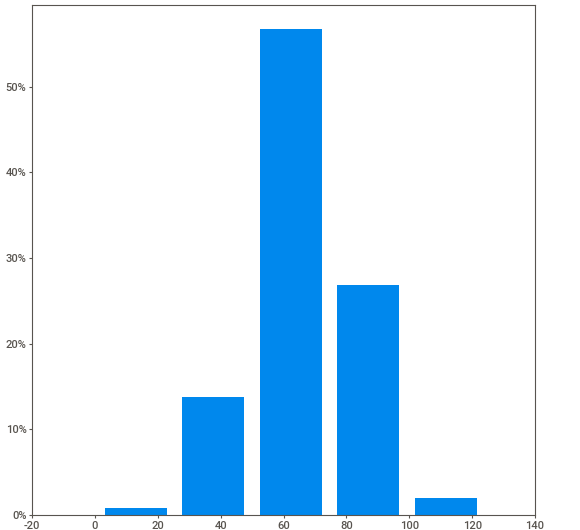
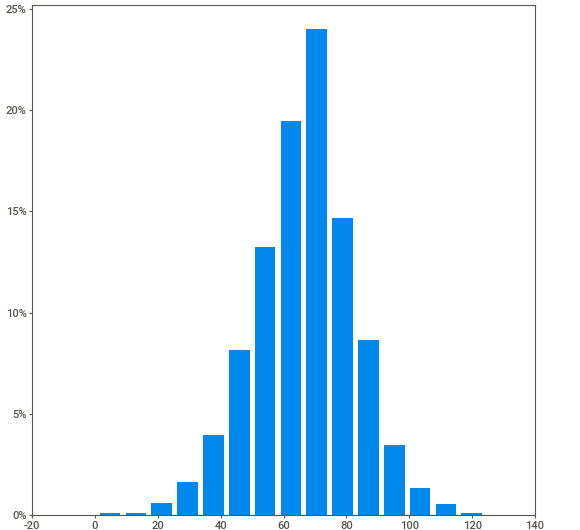
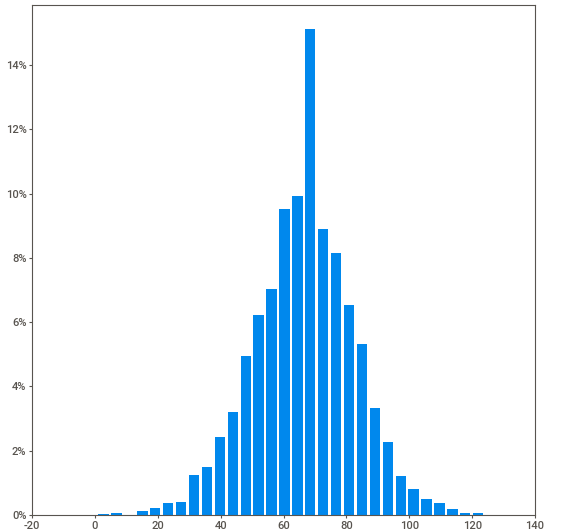
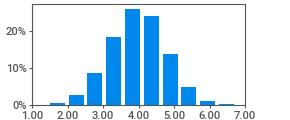
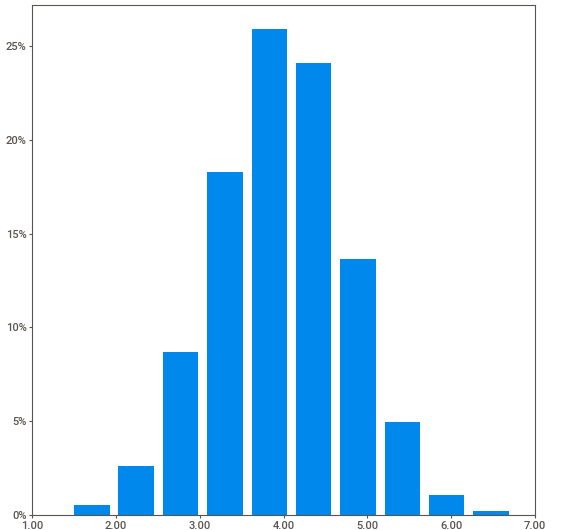
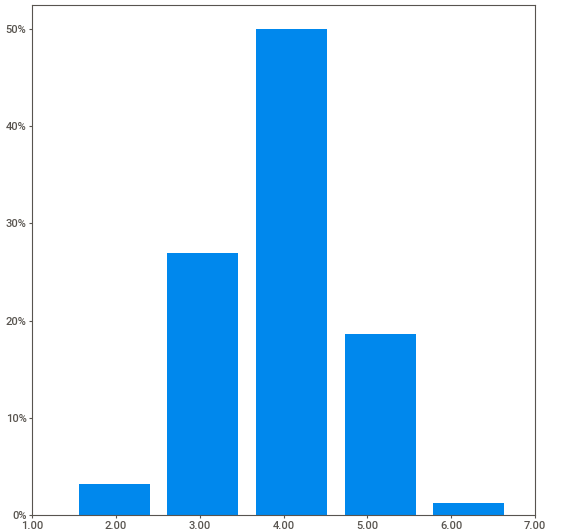
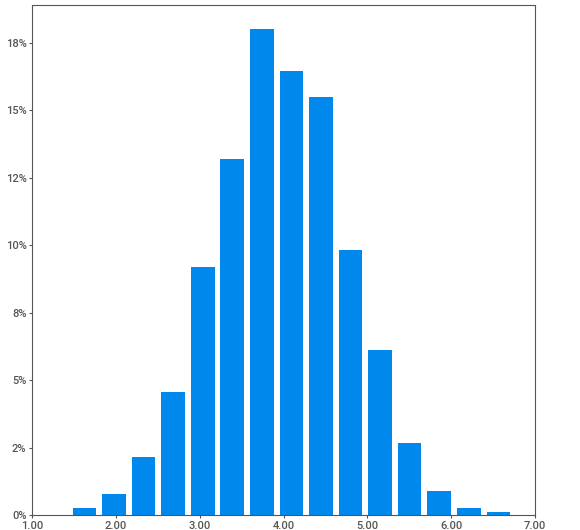
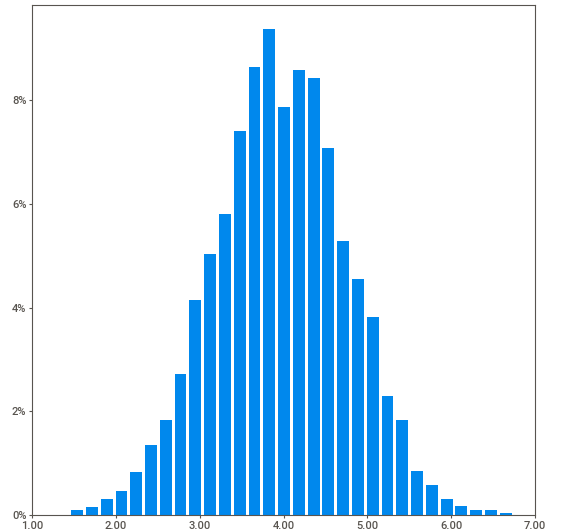
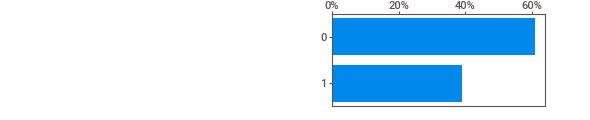
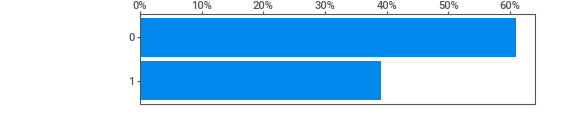
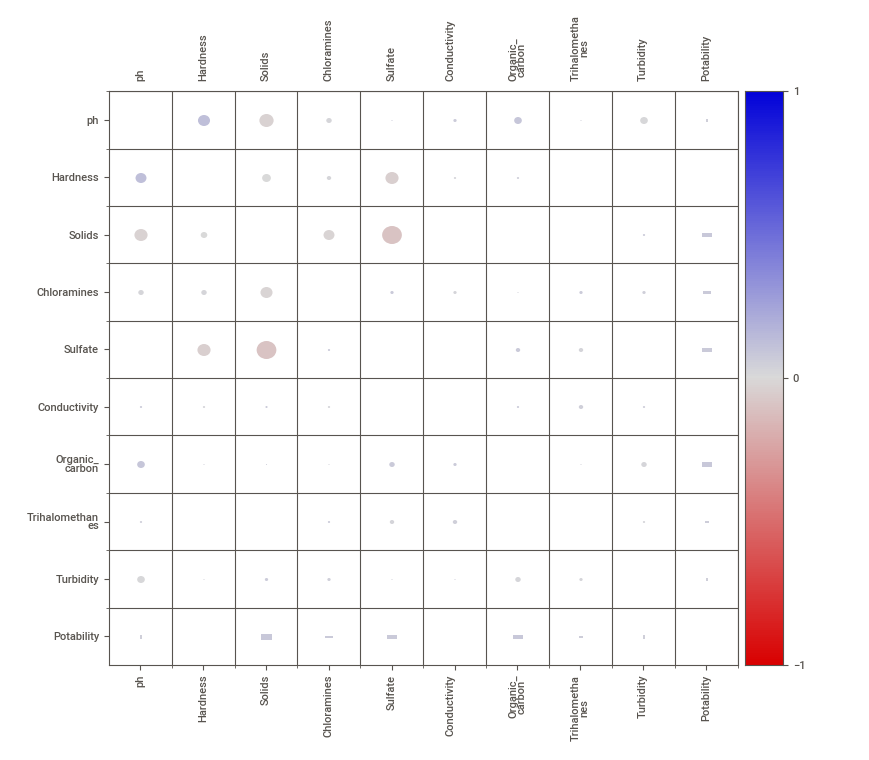
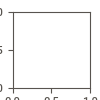

In [ ]:
SV = SV.analyze(df[['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon','Trihalomethanes', 'Turbidity', 'Potability']])
SV.show_notebook()

In [ ]:
import seaborn as sns

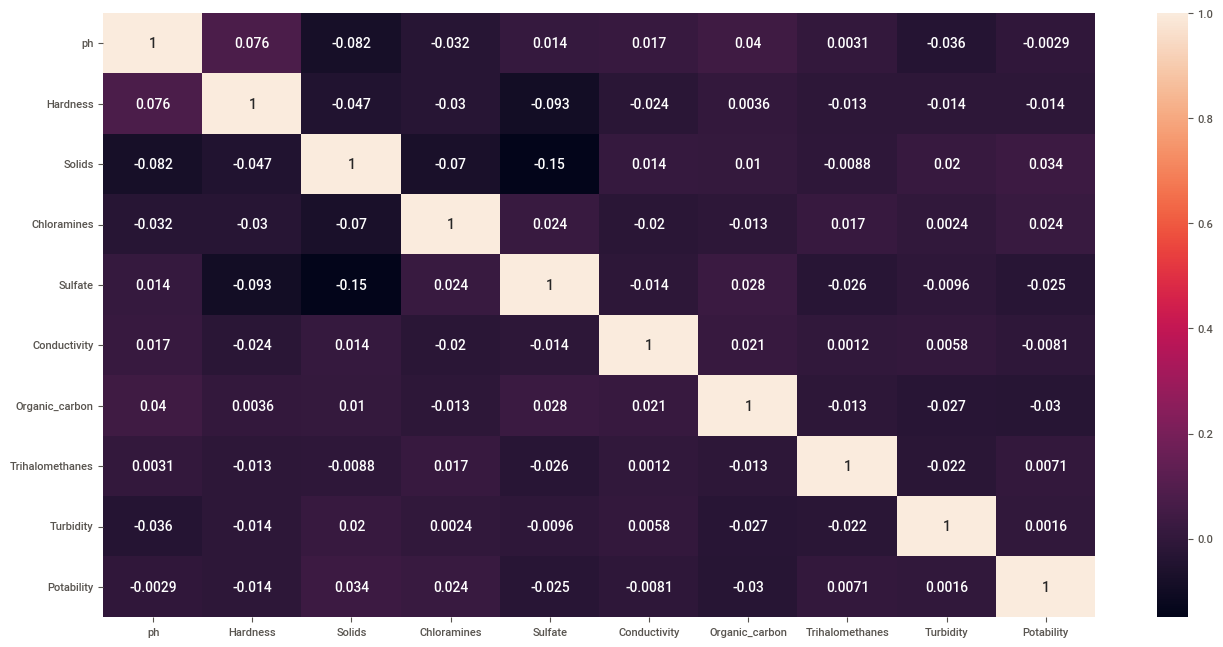

In [ ]:
#correlation between data
corr = df.corr()
plt.figure (figsize= (16,8))
sns.heatmap(corr, annot= True)

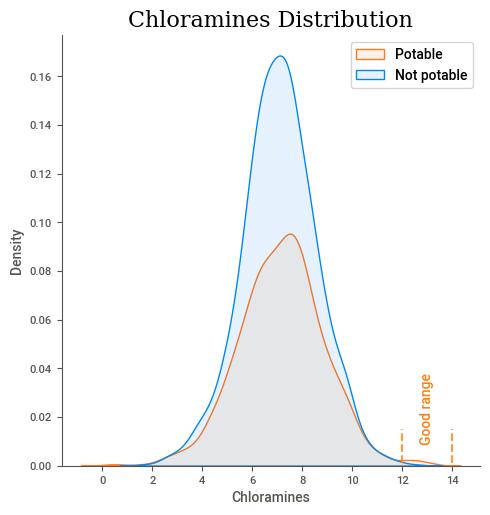

In [ ]:
#Chloramines distribution vs Potability
#Font Title
plt_fnt = {'family':'serif' , 'size':16}

age_kernel_potable = df[df.Potability == 1]['Potability'].mode()[0]
age_kernel_notpotable = df[df.Potability == 0]['Potability'].mode()[0]
sns.displot(data=df, x='Chloramines', hue='Potability', fill = True , kind = 'kde' , legend = False , alpha = 0.1)
plt.legend(labels = ['Potable' , 'Not potable'])
plt.plot([12 , 12] , [0.001,0.015] , linestyle = '--' , c = 'tab:orange' , alpha = 0.8)
plt.plot([14 , 14] , [0.001,0.015] , linestyle = '--' , c = 'tab:orange' , alpha = 0.8)
plt.title('Chloramines Distribution', fontdict = plt_fnt)
plt.text(12.7, 0.01 ,'Good range' , rotation = 90 , color ='tab:orange')
plt.show()

Kadar Chloramines yang baik untuk air minum adalah 12 - 14 ppm 

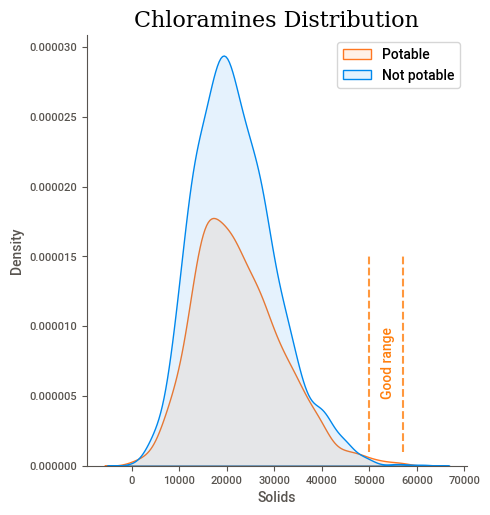

In [ ]:
#Chloramines distribution vs Potability
#Font Title
plt_fnt = {'family':'serif' , 'size':16}

age_kernel_potable = df[df.Potability == 1]['Potability'].mode()[0]
age_kernel_notpotable = df[df.Potability == 0]['Potability'].mode()[0]
sns.displot(data=df, x='Solids', hue='Potability', fill = True , kind = 'kde' , legend = False , alpha = 0.1)
plt.legend(labels = ['Potable' , 'Not potable'])

plt.plot([50000 , 50000] , [0.000001,0.000015] , linestyle = '--' , c = 'tab:orange' , alpha = 0.8)
plt.plot([57000 , 57000] , [0.000001,0.000015] , linestyle = '--' , c = 'tab:orange' , alpha = 0.8)
plt.title('Chloramines Distribution', fontdict = plt_fnt)
plt.text(52500, 0.000005 ,'Good range' , rotation = 90 , color ='tab:orange')
plt.show()



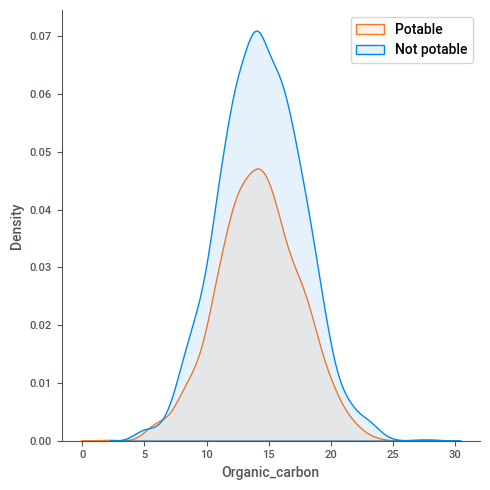

In [ ]:
#Chloramines distribution vs Potability

age_kernel_potable = df[df.Potability == 1]['Potability'].mode()[0]
age_kernel_notpotable = df[df.Potability == 0]['Potability'].mode()[0]
sns.displot(data=df, x='Organic_carbon', hue='Potability', fill = True , kind = 'kde' , legend = False , alpha = 0.1)
plt.legend(labels = ['Potable' , 'Not potable'])


Text(0.5, 1.0, 'Tingkat Potability')

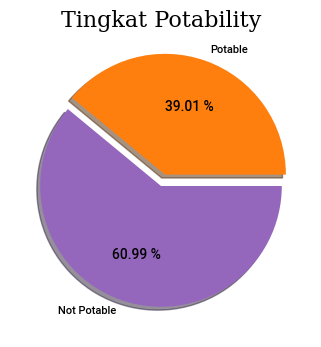

In [ ]:
#Potable vs Not Potable
plt_fnt2 = {'family':'serif' , 'size':16}
plt.pie(x = [len(df[df['Potability'] == 1]) , len(df[df['Potability'] == 0])]  , labels = ['Potable' , 'Not Potable'],
       autopct = '%.2f %%' , shadow = True , explode = [0.1,0] , colors = ['tab:orange' , 'tab:purple'])
plt.title("Tingkat Potability" , fontdict = plt_fnt2)